# Demo 3 - learning an image classifier

## Using the "mycoco.py" module written for assignment 2

In [1]:
import mycoco
mycoco.setmode('train')

loading annotations into memory...
Done (t=13.12s)
creating index...
index created!
loading annotations into memory...
Done (t=0.89s)
creating index...
index created!


In [2]:
toiletids = mycoco.query(['toilet'])
handbagids = mycoco.query(['handbag'])
ids = mycoco.query([['toilet'], ['handbag']], exclusive=False)

In [3]:
len(toiletids[0]), len(handbagids[0]), len(ids[0]), len(ids[1])

(3353, 6841, 3353, 6841)

In [4]:
capiter = mycoco.iter_captions([toiletids[0]], ['toilet'], batch=7)

In [5]:
next(capiter)

(['A couple of toilets sitting next to each other in a bathroom.',
  'A small blue and yellow bathroom with a bidet.',
  'A blue toilet in a dark bathroom with tiles',
  'An old cluttered bathroom with a blue toilet, yellow bidet, yellow bathtub, and dark tiled walls.',
  'Two toilets are sitting in a bathroom with a sink and bathtub. ',
  'A white toilet sitting next to a tub under a window.',
  'A view through a bathroom doorway without a doorway, showing turquoise tile and an unfinished wall section.'],
 ['toilet', 'toilet', 'toilet', 'toilet', 'toilet', 'toilet', 'toilet'])

In [6]:
imgiter = mycoco.iter_images(toiletids, ['toilet'], batch=2)

In [7]:
next(imgiter)

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(array([[[[0.4654902 , 0.38352941, 0.26117647],
          [0.46713725, 0.38823529, 0.26082353],
          [0.47019608, 0.38980392, 0.27333333],
          ...,
          [0.44862745, 0.37196078, 0.27392157],
          [0.43768627, 0.3592549 , 0.26513725],
          [0.43854902, 0.35647059, 0.27329412]],
 
         [[0.47098039, 0.38862745, 0.26705882],
          [0.48639216, 0.38835294, 0.27070588],
          [0.48078431, 0.38862745, 0.27058824],
          ...,
          [0.45254902, 0.36627451, 0.26235294],
          [0.44733333, 0.36890196, 0.27007843],
          [0.44317647, 0.3647451 , 0.27023529]],
 
         [[0.4745098 , 0.39215686, 0.27490196],
          [0.48294118, 0.39411765, 0.28      ],
          [0.48137255, 0.4       , 0.2745098 ],
          ...,
          [0.44901961, 0.37254902, 0.25392157],
          [0.44705882, 0.36921569, 0.26156863],
          [0.44117647, 0.3627451 , 0.26039216]],
 
         ...,
 
         [[0.24980392, 0.26823529, 0.24941176],
          [0.25647

In [8]:
img = next(imgiter)
img[0][0].shape

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(200, 200, 3)

In [9]:
import matplotlib.pyplot as plt

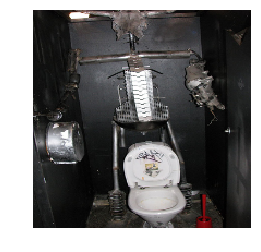

In [10]:
plt.axis('off')
plt.imshow(img[0][0])
plt.show()

## The 'zebra vs. horse' image classifier

In [11]:
zebraids, horseids = mycoco.query([['zebra'], ['horse']])

In [12]:
len(zebraids), len(horseids), len(zebraids) + len(horseids)

(1899, 2924, 4823)

In [28]:
imgs = mycoco.iter_images([zebraids, horseids], [0, 1], batch=10)

def only_img_iter(img_iter):
    for i in img_iter:
        yield (i[0], i[0])

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


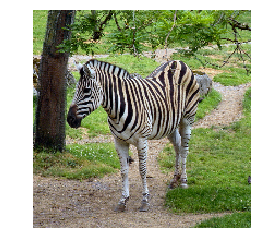

array([[[0.47634706, 0.63878627, 0.24224902],
        [0.45676667, 0.6253902 , 0.19927451],
        [0.51332353, 0.66973529, 0.27304902],
        ...,
        [0.38841176, 0.43612745, 0.32687255],
        [0.58986078, 0.65696078, 0.59047843],
        [0.37744902, 0.48470196, 0.30691176]],

       [[0.46399804, 0.61693922, 0.18948824],
        [0.50303333, 0.65182353, 0.25460392],
        [0.63852941, 0.75908824, 0.43818627],
        ...,
        [0.35412745, 0.49427451, 0.23856863],
        [0.2655    , 0.37222549, 0.20053922],
        [0.27927647, 0.37209804, 0.18099804]],

       [[0.6050098 , 0.70282353, 0.38646078],
        [0.62302941, 0.7244902 , 0.38820588],
        [0.61205882, 0.70308824, 0.39730392],
        ...,
        [0.40171569, 0.55181373, 0.35769608],
        [0.47564706, 0.6057451 , 0.4084902 ],
        [0.41644118, 0.56036275, 0.34057843]],

       ...,

       [[0.6227451 , 0.57673529, 0.59723529],
        [0.57978431, 0.54913725, 0.53210784],
        [0.5154902 , 0

In [14]:
plt.close()
img = next(imgs)
plt.axis('off')
plt.imshow(img[0][2])
plt.show()
img[0][2]

In [29]:
imgs = mycoco.iter_images([zebraids, horseids], [0, 1], batch=10) 
only_imgs = only_img_iter(imgs)

In [33]:
next(only_imgs)[0].shape


/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(10, 200, 200, 3)

In [16]:
from keras.layers import Input, Conv2D, Dense, Activation, Flatten, Dropout, MaxPooling2D, UpSampling2D, Reshape
from keras import Model
import numpy as np

Using TensorFlow backend.


In [106]:
inputlayer = Input(shape=(200,200,3))

#encoder
#input = 28 x 28 x 1 (wide and thin)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputlayer) #28 x 28 x 32
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
#conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
#pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
#conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

# Need to convert to a vector here
#encoded = Flatten()(pool1)
#encoded = Dense(32 * 5**2, activation='tanh')(encoded)
#encoded = Reshape((5, 5, 32))(encoded)

#decoder
#conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
#up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
#conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
up2 = UpSampling2D((2,2))(pool1) # 28 x 28 x 64
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1

model = Model(inputlayer, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
up_sampling2d_58 (UpSampling (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 200, 200, 3)       867       
Total params: 1,763
Trainable params: 1,763
Non-trainable params: 0
_________________________________________________________________


In [145]:
inputlayer = Input(shape=(200,200,3))

encoder = Conv2D(32, (3, 3), activation='relu', padding='same')(inputlayer)
encoder = MaxPooling2D(pool_size=(2, 2))(encoder)
encoder = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D(pool_size=(2, 2))(encoder)
encoder = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D(pool_size=(2, 2))(encoder)

# flatten = Dense(25, activation='tanh')(encoder)
flatten = Flatten(name='encoded_flat')(encoder)
flatten = Reshape((25, 25, 8))(flatten)

decoder = Conv2D(8, (3, 3), activation='relu', padding='same')(flatten)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(16, (3, 3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(32, (3, 3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

autoencoder = Model(inputlayer, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adadelta', loss='mean_squared_error', metrics=['accuracy'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_267 (Conv2D)          (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_268 (Conv2D)          (None, 100, 100, 16)      4624      
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_269 (Conv2D)          (None, 50, 50, 8)         1160      
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 25, 25, 8)         0         
__________

In [140]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoded_flat').output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 100, 100, 16)      4624      
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 50, 50, 8)         1160      
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 25, 25, 8)         0         
__________

In [142]:
model.fit_generator(only_imgs, steps_per_epoch=40, epochs=30)

Epoch 1/30


/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


40/40 [==============================] - 5s 131ms/step - loss: 0.5692 - acc: 0.0068
Epoch 2/30
40/40 [==============================] - 5s 137ms/step - loss: 0.5666 - acc: 0.0083
Epoch 3/30
40/40 [==============================] - 5s 127ms/step - loss: 0.5640 - acc: 0.0102
Epoch 4/30
40/40 [==============================] - 5s 129ms/step - loss: 0.5560 - acc: 0.0097
Epoch 5/30
40/40 [==============================] - 5s 129ms/step - loss: 0.5614 - acc: 0.0129
Epoch 6/30
40/40 [==============================] - 5s 129ms/step - loss: 0.5721 - acc: 0.0080
Epoch 7/30
40/40 [==============================] - 5s 131ms/step - loss: 0.5639 - acc: 0.0085
Epoch 8/30
40/40 [==============================] - 5s 129ms/step - loss: 0.5675 - acc: 0.0069
Epoch 9/30
40/40 [==============================] - 5s 128ms/step - loss: 0.5575 - acc: 0.0134
Epoch 10/30
40/40 [==============================] - 5s 129ms/step - loss: 0.5603 - acc: 0.0140
Epoch 11/30
40/40 [==============================] - 5s 128m

In [143]:
# Need to pass the image as X and Y
#next(only_imgs)
# 
test_img = next(only_imgs)
pred_img = autoencoder.predict(test_img[0])
enc_img = encoder.predict(test_img[0])

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


AttributeError: 'Tensor' object has no attribute 'predict'

Original


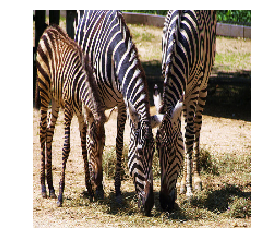

Constructed image


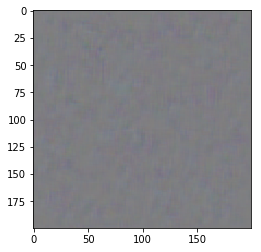

In [144]:
plt.close()
plt.axis('off')
print("Original")
plt.imshow(test_img[0][2])
plt.show()
print("Constructed image")
plt.imshow(pred_img[2])

In [166]:
all_ids = mycoco.query([['']])
all_img = mycoco.iter_images(all_ids, [None])

def only_img_iter(img_iter):
    for i in img_iter:
        yield (i[0], i[0])
        
all_only_img = only_img_iter(all_img)

In [169]:
len(all_ids[0])

118287

In [165]:
next(all_only_img)[0].shape

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(1, 200, 200, 3)